# Import Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CSV file Read

In [3]:
df_raw = pd.read_csv('/content/drive/MyDrive/master.csv')
print(df_raw.shape)
print("Number of Rows:", df_raw.shape[0])
print("Number of Columns:", df_raw.shape[1])
df_raw.head(10)

(27820, 12)
Number of Rows: 27820
Number of Columns: 12


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
print(df_raw.columns)
#print(df_raw.columns.tolist())
df_raw.dtypes

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [5]:
# Renaming the columns

df_raw.columns = ['country', 'year', 'sex', 'age_range', 'suicide_no', 'population', 'suicide_rate',
              'country-year', 'HDI_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation']

df_raw

,country,year,sex,age_range,suicide_no,population,suicide_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [6]:
df_raw.age_range.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_range, dtype: int64

In [7]:
df_raw.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [8]:
# df_raw = df.drop(['country-year'], axis=1)
# df_raw.columns

In [9]:
#df_raw.ndim
df_raw.size

333840

In [10]:
# Optinal Cell

#col_list = []
#for x in df_raw.columns:
    #col_list.append(x)
#    print(col_list)
#col_list

In [11]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age_range       27820 non-null  object 
 4   suicide_no      27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


In [12]:
df_raw.describe()

,year,suicide_no,population,suicide_rate,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [13]:
print(df_raw['age_range'].unique())
print('Total unique values:',len(df_raw['age_range'].unique()))

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']
Total unique values: 6


In [14]:
print(df_raw['country'].unique())
print('Total unique values:',len(df_raw['country'].unique()))

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [15]:
# Min-value per column

#df_raw.min()

In [16]:
# Max-value per column

#df_raw.max()

In [17]:
#df_raw[['age_range','suicide_no','population','suicide_rate']].max()

# Data Vidualization and Ploting
    - Scatter Plot
    - Box Plot
    - Histogram Plot
    - heatmap

# Seaborn
    - based on matplotlib
    - provide High level interface for drawing attractive statistical graphics

# Heatmap Plotting

In [18]:
# to find out the heatmap we have to first find out the 
# feature correlations in the training set NOT in the total/test set
# We have to Split the dataset into train and test sets: 80-20 split

In [19]:
# Sepratating & assigning features and target columns to X & y
y = df_raw['suicide_rate']
X = df_raw.drop('suicide_rate',axis=1)
X.head()

,country,year,sex,age_range,suicide_no,population,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,Albania1987,NaN,"2,156,624,900",796,Boomers


In [20]:
y.head()

0    6.71
1    5.19
2    4.83
3    4.59
4    3.28
Name: suicide_rate, dtype: float64

In [21]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 11), (5564, 11))

In [22]:
%matplotlib inline
X_train.head()

,country,year,sex,age_range,suicide_no,population,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
12656,Israel,2005,male,75+ years,35,126420,Israel2005,0.870,"142,462,925,574",22901,Silent
10264,Greece,2005,male,35-54 years,111,1587504,Greece2005,0.853,"247,783,001,865",23414,Boomers
5013,Canada,1993,male,25-34 years,721,2568700,Canada1993,NaN,"577,170,761,956",21421,Boomers
7957,Ecuador,2006,male,5-14 years,29,1520643,Ecuador2006,NaN,"46,802,044,000",3759,Millenials
21559,Saint Lucia,2008,male,75+ years,0,2611,Saint Lucia2008,NaN,"1,282,215,407",8122,Silent


In [23]:
# Let's find the feature correlations in the training set NOT in the total/test set

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

,year,suicide_no,population,HDI_for_year,gdp_per_capita
year,1.000000,-0.007293,0.006728,0.364604,0.337311
suicide_no,-0.007293,1.000000,0.615013,0.154595,0.063360
population,0.006728,0.615013,1.000000,0.113869,0.087221
HDI_for_year,0.364604,0.154595,0.113869,1.000000,0.768718
gdp_per_capita,0.337311,0.063360,0.087221,0.768718,1.000000


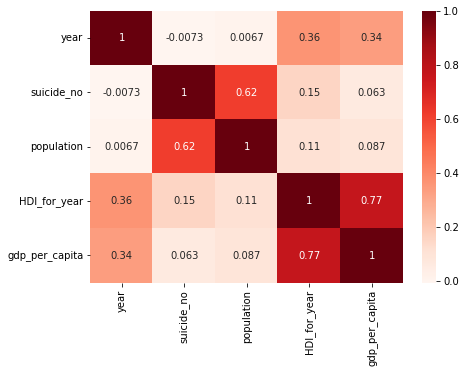

In [24]:
# A good way to visualize correlation is using a heatmap
plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True, cmap = "Reds");
# A link to choose different cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

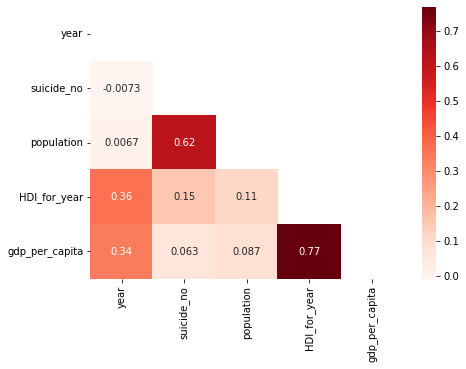

In [25]:
# upper and lower triangles are duplicated
# use of the mask 
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True, cmap = "Reds", mask = mask1); # mask1 removes the upper triangle
# sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2); # mask1 removes the lower triangle

In [26]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr() # correlation matrix of all the features
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(X_train, 0.7) # 85% is a good value of the threshold. It is a hyperparameter
print(len(corr_features))
print(corr_features)

1
{'gdp_per_capita'}


In [28]:
# X_train.drop('gdp_per_capita',axis=1)
# X_test.drop('gdp_per_capita',axis=1)
X_train.columns

Index(['country', 'year', 'sex', 'age_range', 'suicide_no', 'population',
       'country-year', 'HDI_for_year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

# Scatterplotting

<Figure size 576x576 with 0 Axes>

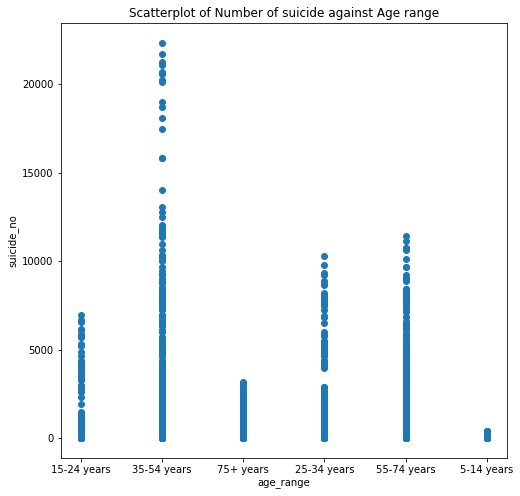

<Figure size 576x576 with 0 Axes>

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(x = 'age_range', y = 'suicide_no', data = df_raw)
plt.xlabel('age_range')
plt.ylabel('suicide_no')
plt.title('Scatterplot of Number of suicide against Age range')
plt.figure(figsize=(8,8))

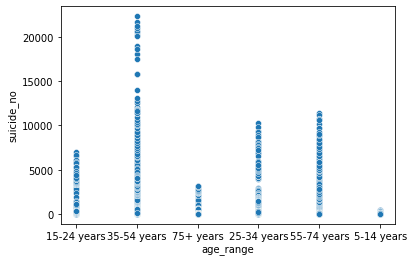

In [30]:
sns.scatterplot(x = 'age_range', y = 'suicide_no', data = df_raw)

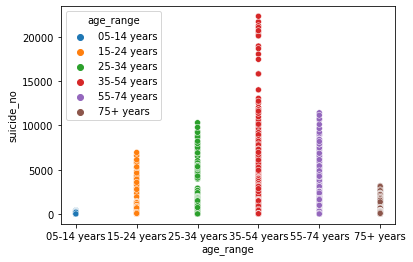

In [31]:
df_raw['age_range'] = df_raw['age_range'].str.replace('5-14 years', '05-14 years')
df_AGE_sorted = df_raw.sort_values(by='age_range')
sns.scatterplot(x = 'age_range', y = 'suicide_no', hue = 'age_range', data = df_AGE_sorted)
# plt.axhline(y=222, color='r', linestyle='-')

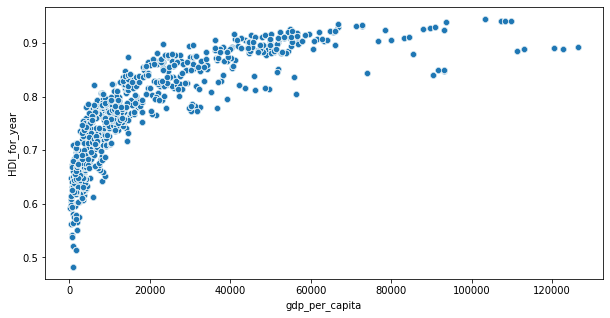

In [32]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'gdp_per_capita', y = 'HDI_for_year', data = df_raw)

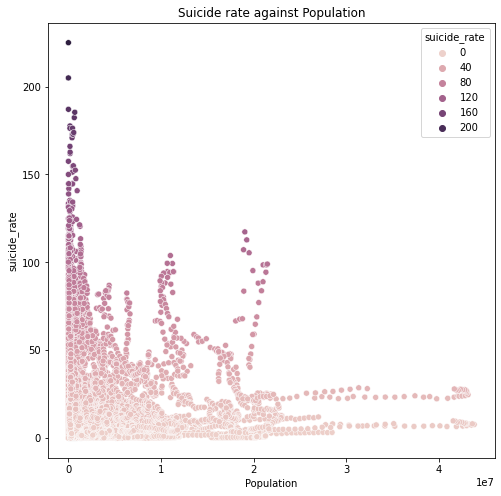

In [33]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'population', y = 'suicide_rate', hue = 'suicide_rate', data = df_raw)
plt.xlabel('Population', fontsize = 10)
plt.xlabel('Population', fontsize = 10)
plt.title('Suicide rate against Population')
plt.show()

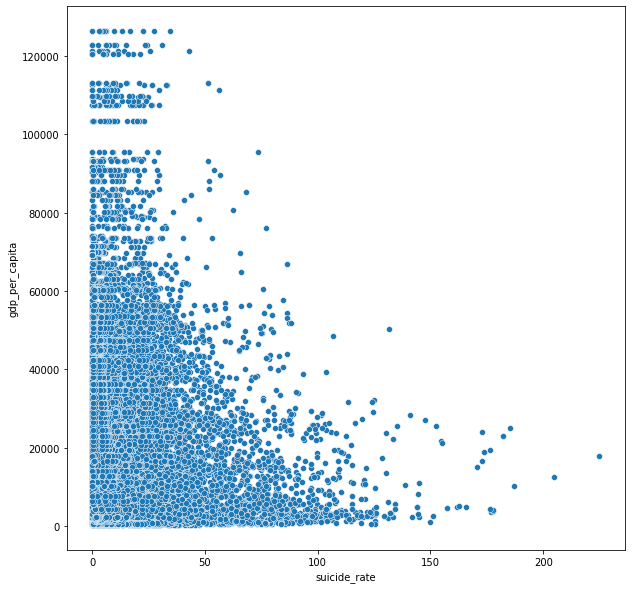

In [34]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'suicide_rate', y = 'gdp_per_capita', data = df_raw)

# Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbca35c3a30>,
      dtype=object)

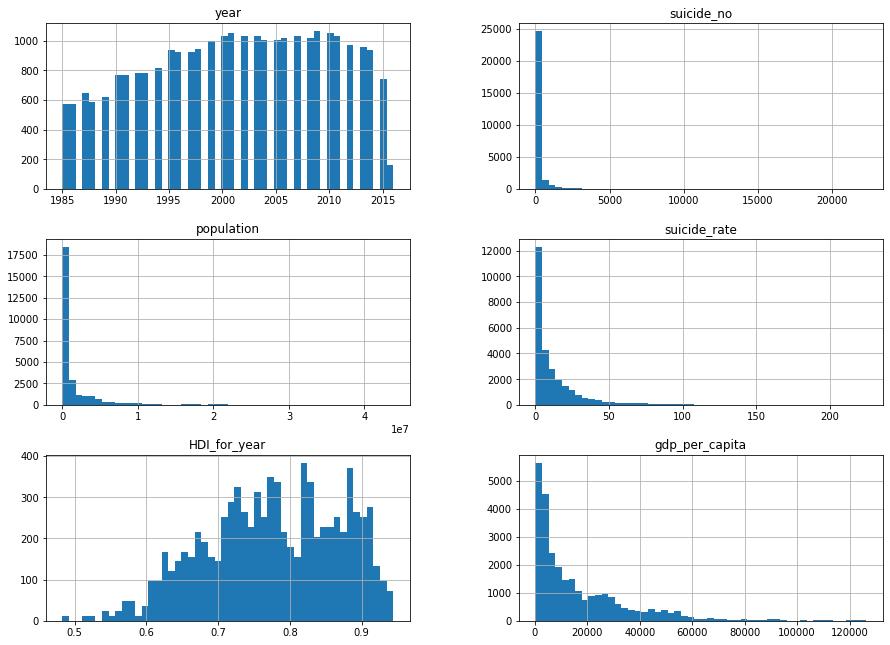

In [35]:
df_raw.hist(bins = 50, figsize = (15, 11))

In [36]:
df_raw['sex'].unique()

array(['male', 'female'], dtype=object)

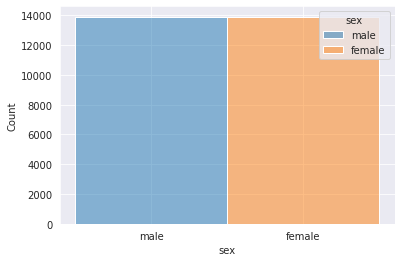

In [37]:
# plt.figure(figsize = (8, 8))
sns.set_style('darkgrid')
sns.histplot(x = 'sex', hue = 'sex', data = df_raw)
# plt.xlabel("Number of suicide commited")
# plt.show()

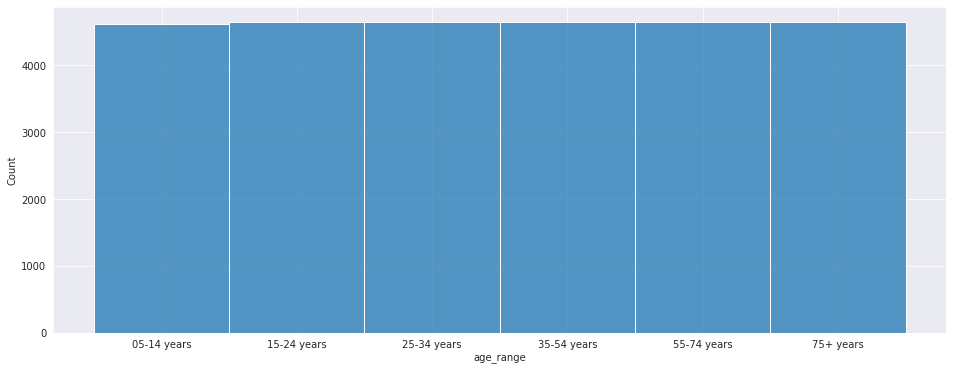

In [38]:
plt.figure(figsize = (16, 6))
df_sort = df_raw.sort_values(by='age_range')
sns.histplot(x = 'age_range', data = df_sort)
plt.show()

In [39]:
## Histogram works for continuous data

# plt.figure(figsize = (14, 8))
# sns.set_style('darkgrid')
# sns.histplot(x = 'year', y = 'suicide_no', data = df_raw)

In [40]:
## Histogram works for continuous data

# plt.figure(figsize = (8,26))
# sns.histplot(x = 'suicide_no', y = 'country', data = df_raw)
# plt.ylabel('country', fontsize = 20)

In [41]:
df_groupby = df_raw.groupby(['year', 'age_range']).sum()
df_groupby.head(12)

suicide_no  population  suicide_rate  HDI_for_year  \
year age_range                                                         
1985 05-14 years         984   199192522         51.56        51.738   
     15-24 years       17870   196974439        809.25        51.738   
     25-34 years       20771   173536624        960.84        51.738   
     35-54 years       35748   246046628       1190.69        51.738   
     55-74 years       28736   152769432       1449.06        51.738   
     75+ years         11954    40080441       2350.49        51.738   
1986 05-14 years         944   202815438         40.46         0.000   
     15-24 years       18063   199238573        782.60         0.000   
     25-34 years       21685   176214788       1017.01         0.000   
     35-54 years       37558   253601356       1122.76         0.000   
     55-74 years       29760   156574209       1340.64         0.000   
     75+ years         12660    41465249       2276.37         0.000   

                  gdp_per_capita  
year age_range                    
1985 05-14 years          584758  
     15-24 years          584758  
     25-34 years          584758  
     35-54 years          584758  
     55-74 years          584758  
     75+ years            584758  
1986 05-14 years          684106  
     15-24 years          684106  
     25-34 years          684106  
     35-54 years          684106  
     55-74 years          684106  
     75+ years            684106

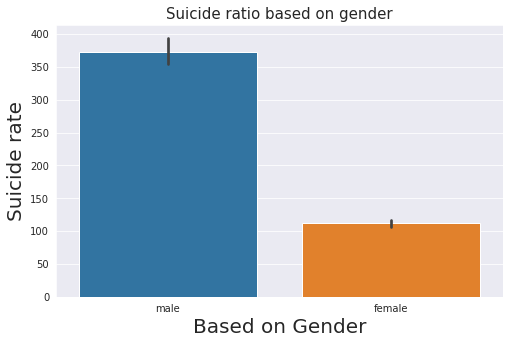

In [42]:
plt.figure(figsize = (8, 5))
sns.barplot(x = 'sex', y = 'suicide_no', data = df_raw)
plt.xlabel('Based on Gender', fontsize = 20)
plt.ylabel('Suicide rate', fontsize = 20)
plt.title('Suicide ratio based on gender', fontsize = 15)
plt.show()

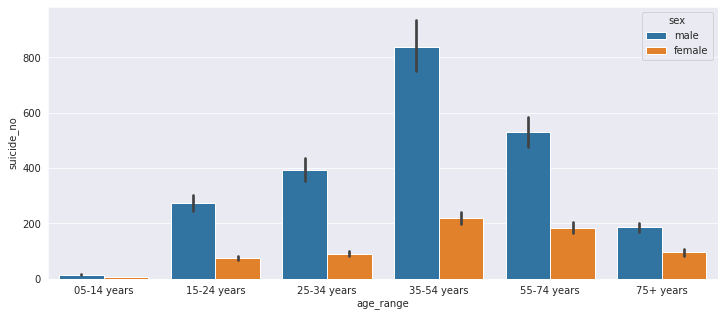

In [43]:
plt.figure(figsize = (12, 5))
sns.barplot(x = 'age_range', y = 'suicide_no', hue = 'sex', data = df_sort)
plt.show()

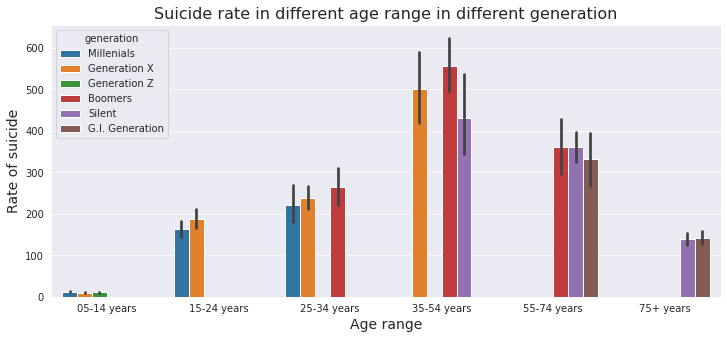

In [44]:
plt.figure(figsize = (12, 5))
sns.barplot(x = 'age_range', y = 'suicide_no', hue = 'generation', data = df_sort)
plt.xlabel('Age range', fontsize = 14)
plt.ylabel('Rate of suicide', fontsize = 14)
plt.title('Suicide rate in different age range in different generation', fontsize = 16)
plt.show()

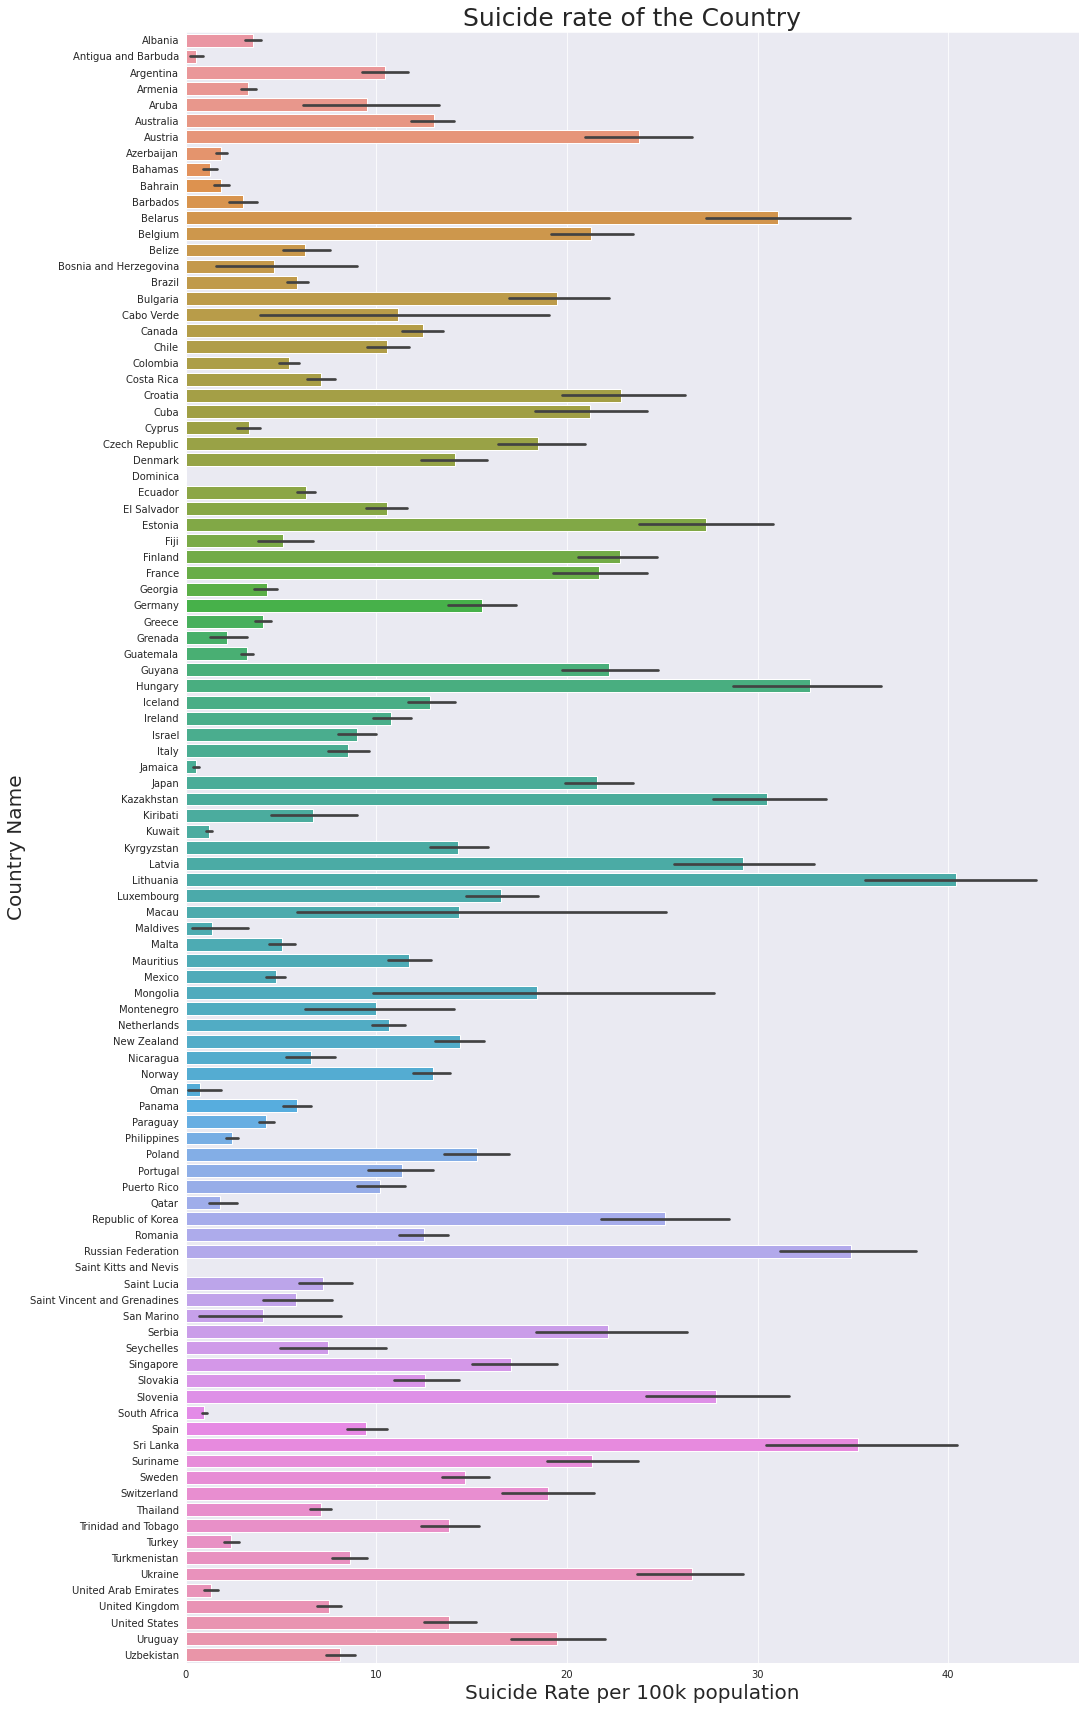

In [45]:
plt.figure(figsize = (16, 30))
sns.barplot(x = 'suicide_rate', y = 'country', data = df_raw)
plt.xlabel('Suicide Rate per 100k population', fontsize = 20)
plt.ylabel('Country Name', fontsize = 20)
plt.title('Suicide rate of the Country', fontsize = 25)
plt.show()

# KDE-Plotting

In [46]:
df_raw.columns

Index(['country', 'year', 'sex', 'age_range', 'suicide_no', 'population',
       'suicide_rate', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

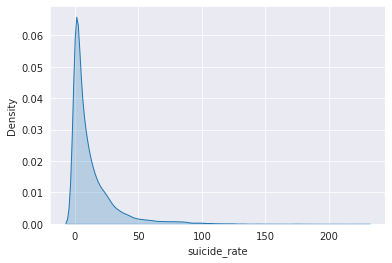

In [47]:
#Let's make the KDE plot for suicides_no without hue           
sns.kdeplot(x = 'suicide_rate', data = df_raw,shade = True)
#plt.xlabel('x-axis')

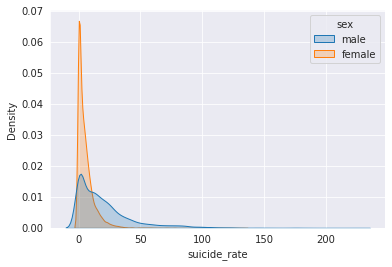

In [48]:
#Let's make the KDE plot for suicides_no with hue           
sns.kdeplot(x = 'suicide_rate', data = df_raw, hue = 'sex', shade = True)

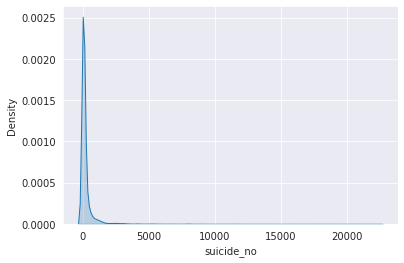

In [49]:
#Let's make the KDE plot for suicides_no without hue           
sns.kdeplot(x = 'suicide_no', data = df_raw, shade = True)
#plt.xlabel('x-axis')

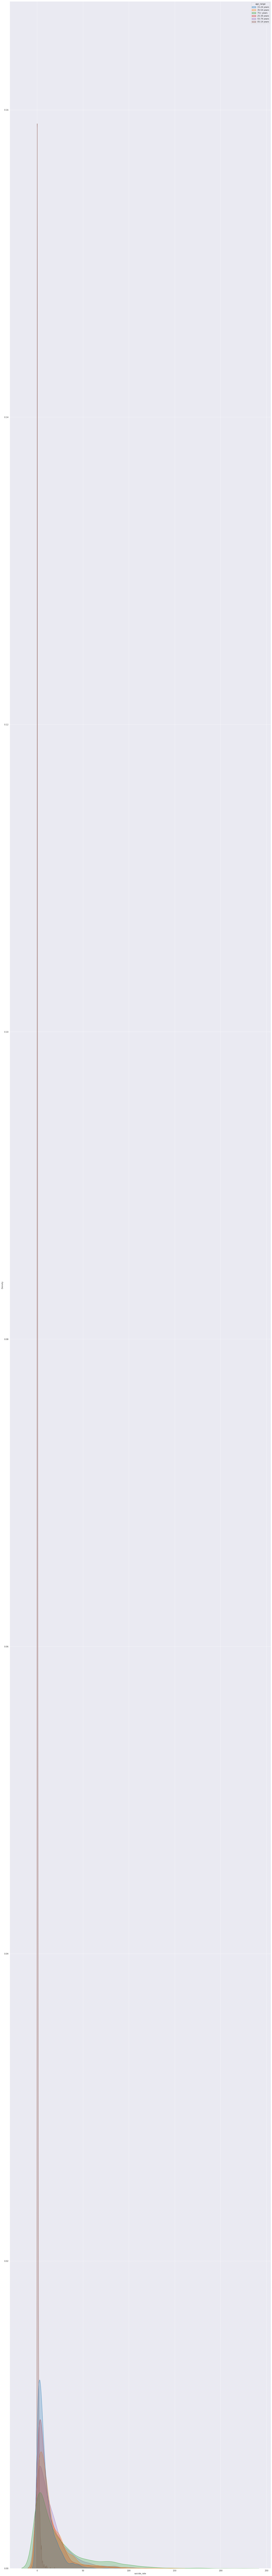

In [50]:
#Let's make the KDE plot for suicides_no with hue           
plt.figure(figsize = (24,242))
sns.kdeplot(x = 'suicide_rate', data = df_raw, hue = 'age_range', shade = True)

Text(0, 0.5, 'output')

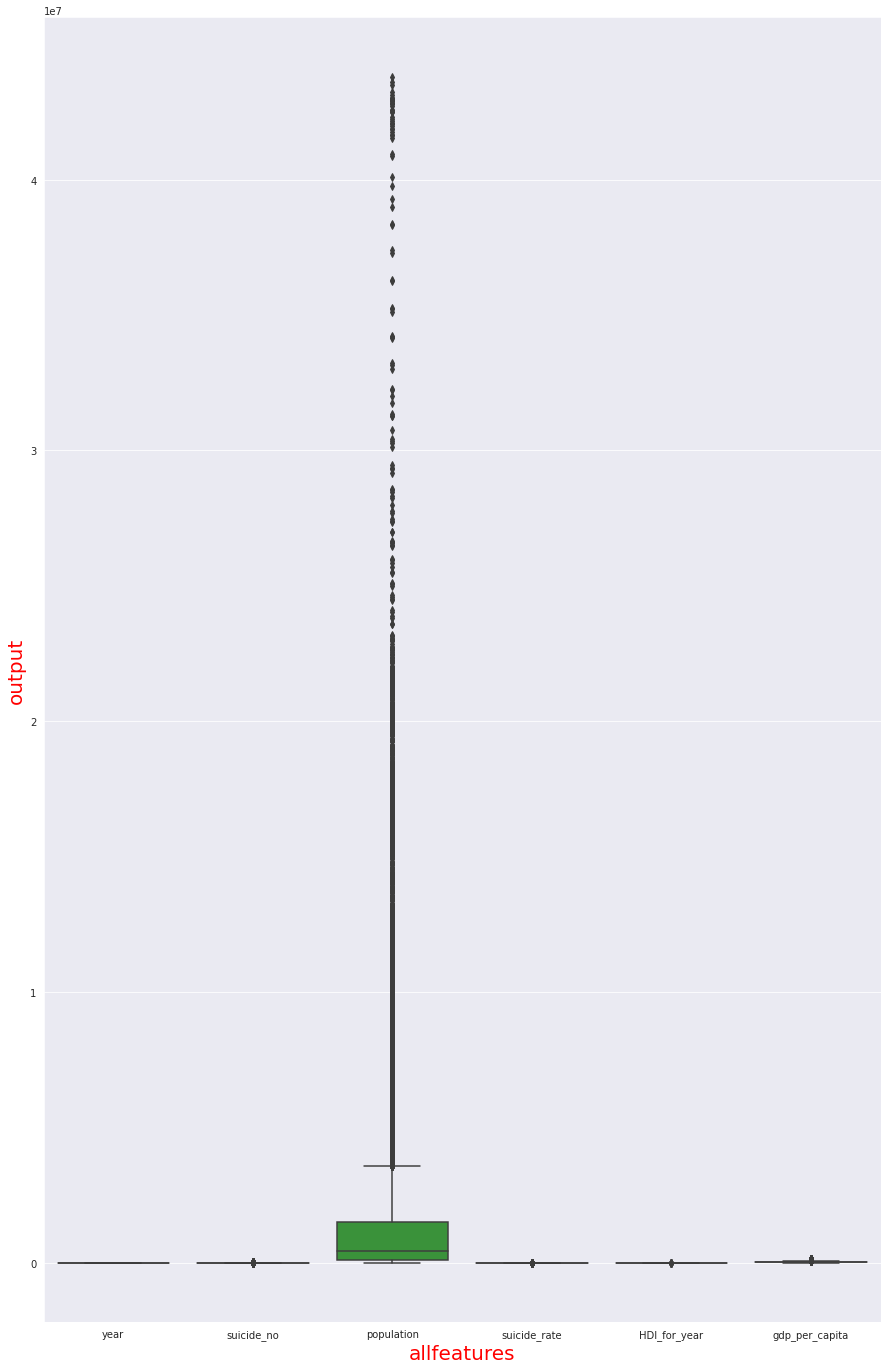

In [51]:
# Boxplot of all the features
plt.figure(figsize = (15,24))
sns.boxplot(data = df_raw)
plt.xlabel('allfeatures', fontsize = '20', color = 'red')
plt.ylabel('output', fontsize = '20', color = 'red')

In [52]:
# implementation of the Tukey's algorithm
# values that look different from the other values in the data
# Box plots are a visual method to identify outliers
def findOutliers(dataset):
    outliers = []
    Q2 = dataset.median()
    Q1 = dataset.describe()[4]
    Q3 = dataset.describe()[6]
    
    # Q1 = dataset.quantile(0.25)
    # Q3 = dataset.quantile(0.75)
    
    # 
    
    IQR = Q3 - Q1
    lf = Q1 - 1.5*IQR # lf = lower fence
    uf = Q3 + 1.5*IQR # Uf = Upper fence
    for x in dataset:
        if x < lf or x > uf:
            outliers.append(x)
    return outliers
findOutliers(df_raw['gdp_per_capita'])

[66770,
 66770,
 66770,
 66770,
 66770,
 66770,
 66770,
 66770,
 66770,
 66770,
 66770,
 66770,
 72669,
 72669,
 72669,
 72669,
 72669,
 72669,
 72669,
 72669,
 72669,
 72669,
 72669,
 72669,
 72856,
 72856,
 72856,
 72856,
 72856,
 72856,
 72856,
 72856,
 72856,
 72856,
 72856,
 72856,
 66809,
 66809,
 66809,
 66809,
 66809,
 66809,
 66809,
 66809,
 66809,
 66809,
 66809,
 66809,
 60656,
 60656,
 60656,
 60656,
 60656,
 60656,
 60656,
 60656,
 60656,
 60656,
 60656,
 60656,
 62229,
 62229,
 62229,
 62229,
 62229,
 62229,
 62229,
 62229,
 62229,
 62229,
 62229,
 62229,
 68447,
 68447,
 68447,
 68447,
 68447,
 68447,
 68447,
 68447,
 68447,
 68447,
 68447,
 68447,
 61863,
 61863,
 61863,
 61863,
 61863,
 61863,
 61863,
 61863,
 61863,
 61863,
 61863,
 61863,
 61711,
 61711,
 61711,
 61711,
 61711,
 61711,
 61711,
 61711,
 61711,
 61711,
 61711,
 61711,
 65598,
 65598,
 65598,
 65598,
 65598,
 65598,
 65598,
 65598,
 65598,
 65598,
 65598,
 65598,
 62071,
 62071,
 62071,
 62071,
 62071,


# Data Preprocessing
    - Imputation technique for Null-Value
    - Data Normalization

In [53]:
# detect duplicates if there is any
duplicate = df_raw[df_raw.duplicated()]
duplicate

,country,year,sex,age_range,suicide_no,population,suicide_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation


In [54]:
# there are no duplicates data.
# but if there were any duplicate dat then we will drop it as below
# df_raw.drop_duplicates(inplace = True)

In [55]:
#checking the data for null or missing values

df_raw.isnull().sum()

country               0
year                  0
sex                   0
age_range             0
suicide_no            0
population            0
suicide_rate          0
country-year          0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [56]:
#dropping the HDI for year column
df_HDI_drop = df_raw.drop(['HDI_for_year'], axis = 1)

In [57]:
df_HDI_drop.columns

Index(['country', 'year', 'sex', 'age_range', 'suicide_no', 'population',
       'suicide_rate', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [58]:
# Replace null values with zero using fillna
df_zero = df_raw
df_zero = df_raw.fillna(0)
df_zero

,country,year,sex,age_range,suicide_no,population,suicide_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.000,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.000,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.000,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.000,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [59]:
# df_raw.head()
# Replace null values with mean

df_mean = df_raw
df_mean['HDI_for_year'] = df_raw['HDI_for_year'].fillna(df_raw['HDI_for_year'].mean())
df_mean.isnull().sum()


country           0
year              0
sex               0
age_range         0
suicide_no        0
population        0
suicide_rate      0
country-year      0
HDI_for_year      0
gdp_for_year      0
gdp_per_capita    0
generation        0
dtype: int64

In [60]:
df_mean.head(10)

,country,year,sex,age_range,suicide_no,population,suicide_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,0.776601,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,0.776601,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,05-14 years,0,311000,0.00,Albania1987,0.776601,"2,156,624,900",796,Generation X


In [61]:
# Replace null values with median
df_median = df_raw
df_median['HDI_for_year'] = df_median['HDI_for_year'].fillna(df_raw['HDI_for_year'].median())
df_median.isnull().sum()
#df_raw.head()

country           0
year              0
sex               0
age_range         0
suicide_no        0
population        0
suicide_rate      0
country-year      0
HDI_for_year      0
gdp_for_year      0
gdp_per_capita    0
generation        0
dtype: int64

In [62]:
df_median.head(10)

,country,year,sex,age_range,suicide_no,population,suicide_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,0.776601,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,0.776601,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,05-14 years,0,311000,0.00,Albania1987,0.776601,"2,156,624,900",796,Generation X


In [63]:
## HDI columns drop
# df_HDI_drop = df_raw.drop(['HDI for year'],axis=1) # only this line run giving error
# df_HDI_drop.isnull().sum()

In [64]:
df = df_mean.drop(["country-year"], axis = 1)
df

,country,year,sex,age_range,suicide_no,population,suicide_rate,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675000,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675000,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,0.675000,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,0.675000,"63,067,077,179",2309,Generation Z


In [65]:
# droped the country-year from the df_HDI_drop where HDI column was droped
df_new = df_HDI_drop.drop(["country-year"], axis = 1)
df_new

,country,year,sex,age_range,suicide_no,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [66]:
df_raw

,country,year,sex,age_range,suicide_no,population,suicide_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675000,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z


# Feature Selection
    - Most Impactful features selection

In [67]:
# It is shown in the vidualization portion 

# Feature Scaling and Encoding
    - One-hot encoding
    - Normalization

In [68]:
df.dtypes

country            object
year                int64
sex                object
age_range          object
suicide_no          int64
population          int64
suicide_rate      float64
HDI_for_year      float64
gdp_for_year       object
gdp_per_capita      int64
generation         object
dtype: object

In [69]:
# converting 'gdp_for_year' from object to float

df["gdp_for_year"] = df["gdp_for_year"].str.replace(',','').astype(float)

df.dtypes

country            object
year                int64
sex                object
age_range          object
suicide_no          int64
population          int64
suicide_rate      float64
HDI_for_year      float64
gdp_for_year      float64
gdp_per_capita      int64
generation         object
dtype: object

In [70]:
# converting 'gdp_for_year' from object to float

df_new["gdp_for_year"] = df_new["gdp_for_year"].str.replace(',','').astype(float)

df.dtypes

country            object
year                int64
sex                object
age_range          object
suicide_no          int64
population          int64
suicide_rate      float64
HDI_for_year      float64
gdp_for_year      float64
gdp_per_capita      int64
generation         object
dtype: object

In [71]:
df2 = pd.get_dummies(data = df, columns = ['country', 'sex', 'age_range', 'generation'], drop_first = True)
df2

,year,suicide_no,population,suicide_rate,HDI_for_year,gdp_for_year,gdp_per_capita,country_Antigua and Barbuda,country_Argentina,country_Armenia,...,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_55-74 years,age_range_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,0.776601,2.156625e+09,796,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,0.776601,2.156625e+09,796,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1987,14,289700,4.83,0.776601,2.156625e+09,796,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,0.776601,2.156625e+09,796,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1987,9,274300,3.28,0.776601,2.156625e+09,796,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,107,3620833,2.96,0.675000,6.306708e+10,2309,0,0,0,...,0,0,1,0,0,0,1,0,0,0
27816,2014,9,348465,2.58,0.675000,6.306708e+10,2309,0,0,0,...,0,0,0,0,1,0,0,0,0,1
27817,2014,60,2762158,2.17,0.675000,6.306708e+10,2309,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27818,2014,44,2631600,1.67,0.675000,6.306708e+10,2309,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
df_new = pd.get_dummies(data = df_new, columns = ['country','year', 'sex', 'age_range', 'generation'], drop_first = True)
df_new

,suicide_no,population,suicide_rate,gdp_for_year,gdp_per_capita,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,...,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_55-74 years,age_range_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,21,312900,6.71,2.156625e+09,796,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,16,308000,5.19,2.156625e+09,796,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,14,289700,4.83,2.156625e+09,796,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,21800,4.59,2.156625e+09,796,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,9,274300,3.28,2.156625e+09,796,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,107,3620833,2.96,6.306708e+10,2309,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
27816,9,348465,2.58,6.306708e+10,2309,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
27817,60,2762158,2.17,6.306708e+10,2309,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27818,44,2631600,1.67,6.306708e+10,2309,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
cols_to_scale = ['year','suicide_no','population','suicide_rate','HDI_for_year','gdp_for_year',
                'gdp_per_capita']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [74]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

year: [0.06451613 0.09677419 0.12903226 0.22580645 0.25806452 0.29032258
 0.32258065 0.35483871 0.38709677 0.41935484 0.4516129  0.48387097
 0.51612903 0.5483871  0.58064516 0.61290323 0.64516129 0.67741935
 0.70967742 0.74193548 0.77419355 0.80645161 0.         0.03225806
 0.16129032 0.19354839 0.87096774 0.90322581 0.93548387 0.96774194
 0.83870968 1.        ]
suicide_no: [0.0009401  0.00071627 0.00062673 ... 0.24635151 0.19513833 0.12857015]
population: [0.00713668 0.00702482 0.00660706 ... 0.06304952 0.06006908 0.03284235]
suicide_rate: [0.0298262  0.02306974 0.02146953 ... 0.21273948 0.18113526 0.11828244]
HDI_for_year: [0.63687885 0.29501085 0.37527115 0.45986985 0.51843818 0.64642082
 0.65075922 0.45770065 0.48156182 0.53796095 0.60520607 0.63340564
 0.71149675 0.72668113 0.75488069 0.75921909 0.76572668 0.32321041
 0.26464208 0.35791757 0.51626898 0.52060738 0.53145336 0.54229935
 0.82863341 0.86550976 0.90021692 0.96312364 0.96963124 0.97396963
 0.97613883 0.98047722 0.6095444

In [75]:
df2

,year,suicide_no,population,suicide_rate,HDI_for_year,gdp_for_year,gdp_per_capita,country_Antigua and Barbuda,country_Argentina,country_Armenia,...,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_55-74 years,age_range_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0.064516,0.000940,0.007137,0.029826,0.636879,0.000116,0.004322,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.064516,0.000716,0.007025,0.023070,0.636879,0.000116,0.004322,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.064516,0.000627,0.006607,0.021470,0.636879,0.000116,0.004322,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.064516,0.000045,0.000491,0.020403,0.636879,0.000116,0.004322,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0.064516,0.000403,0.006256,0.014580,0.636879,0.000116,0.004322,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0.935484,0.004790,0.082652,0.013157,0.416486,0.003478,0.016320,0,0,0,...,0,0,1,0,0,0,1,0,0,0
27816,0.935484,0.000403,0.007949,0.011468,0.416486,0.003478,0.016320,0,0,0,...,0,0,0,0,1,0,0,0,0,1
27817,0.935484,0.002686,0.063050,0.009646,0.416486,0.003478,0.016320,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27818,0.935484,0.001970,0.060069,0.007423,0.416486,0.003478,0.016320,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
cols_to_scale = ['suicide_no','population','suicide_rate','gdp_for_year',
                'gdp_per_capita']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new[cols_to_scale] = scaler.fit_transform(df_new[cols_to_scale])

In [77]:
for col in df_new:
    print(f'{col}: {df_new[col].unique()}')

suicide_no: [0.0009401  0.00071627 0.00062673 ... 0.24635151 0.19513833 0.12857015]
population: [0.00713668 0.00702482 0.00660706 ... 0.06304952 0.06006908 0.03284235]
suicide_rate: [0.0298262  0.02306974 0.02146953 ... 0.21273948 0.18113526 0.11828244]
gdp_for_year: [0.00011643 0.00011474 0.00012628 ... 0.00285722 0.00318109 0.00347781]
gdp_per_capita: [0.00432193 0.00410782 0.00461535 ... 0.01358435 0.01505936 0.01632025]
country_Antigua and Barbuda: [0 1]
country_Argentina: [0 1]
country_Armenia: [0 1]
country_Aruba: [0 1]
country_Australia: [0 1]
country_Austria: [0 1]
country_Azerbaijan: [0 1]
country_Bahamas: [0 1]
country_Bahrain: [0 1]
country_Barbados: [0 1]
country_Belarus: [0 1]
country_Belgium: [0 1]
country_Belize: [0 1]
country_Bosnia and Herzegovina: [0 1]
country_Brazil: [0 1]
country_Bulgaria: [0 1]
country_Cabo Verde: [0 1]
country_Canada: [0 1]
country_Chile: [0 1]
country_Colombia: [0 1]
country_Costa Rica: [0 1]
country_Croatia: [0 1]
country_Cuba: [0 1]
country_Cy

In [78]:
df_new

,suicide_no,population,suicide_rate,gdp_for_year,gdp_per_capita,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,...,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_55-74 years,age_range_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0.000940,0.007137,0.029826,0.000116,0.004322,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.000716,0.007025,0.023070,0.000116,0.004322,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.000627,0.006607,0.021470,0.000116,0.004322,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.000045,0.000491,0.020403,0.000116,0.004322,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0.000403,0.006256,0.014580,0.000116,0.004322,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0.004790,0.082652,0.013157,0.003478,0.016320,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
27816,0.000403,0.007949,0.011468,0.003478,0.016320,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
27817,0.002686,0.063050,0.009646,0.003478,0.016320,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27818,0.001970,0.060069,0.007423,0.003478,0.016320,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Validation Techinque
    - Hold-out Validation
    - Train Test split

In [79]:
# Train-Test splitting for df2 dataset
X = df2.drop('suicide_rate', axis = 'columns')
y = df2['suicide_rate']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((22256, 117), (5564, 117))

In [80]:
y_train.value_counts()

0.000000    3411
0.001289      63
0.001422      54
0.001511      44
0.001645      41
            ... 
0.356314       1
0.162777       1
0.191848       1
0.115838       1
0.164466       1
Name: suicide_rate, Length: 4866, dtype: int64

In [81]:
# Train-Test splitting for df_new dataset
X1 = df_new.drop('suicide_rate', axis = 'columns')
y1 = df_new['suicide_rate']

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)
X1_train.shape, X1_test.shape

((22256, 146), (5564, 146))

In [82]:
y1_train.value_counts()

0.000000    3411
0.001289      63
0.001422      54
0.001511      44
0.001645      41
            ... 
0.356314       1
0.162777       1
0.191848       1
0.115838       1
0.164466       1
Name: suicide_rate, Length: 4866, dtype: int64

In [83]:
X.head()

,year,suicide_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,...,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_55-74 years,age_range_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0.064516,0.000940,0.007137,0.636879,0.000116,0.004322,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.064516,0.000716,0.007025,0.636879,0.000116,0.004322,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.064516,0.000627,0.006607,0.636879,0.000116,0.004322,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.064516,0.000045,0.000491,0.636879,0.000116,0.004322,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0.064516,0.000403,0.006256,0.636879,0.000116,0.004322,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [84]:
X1.head()

,suicide_no,population,gdp_for_year,gdp_per_capita,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,...,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_55-74 years,age_range_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0.000940,0.007137,0.000116,0.004322,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.000716,0.007025,0.000116,0.004322,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.000627,0.006607,0.000116,0.004322,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.000045,0.000491,0.000116,0.004322,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0.000403,0.006256,0.000116,0.004322,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# LinearRegression
    
    -Lasso
    -Ridge

In [85]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X1_train, y1_train)

LinearRegression()

In [86]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X1_test)
y_train_lr = lr.predict(X1_train)

In [87]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#computing the accuracy of the model performance
acc_train_lr = lr.score(X1_train, y1_train)
acc_test_lr = lr.score(X1_test, y1_test)

#computing root mean squared error (RMSE)
print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:',np.sqrt(mean_squared_error(y1_train,y_train_lr)))
print('Linear Regression: The RMSE of the testing set is:',np.sqrt(mean_squared_error(y1_test,y_test_lr)))
print('\nLinear Regression: The MAE of the training set is:',mean_absolute_error(y1_train,y_train_lr))
print('Linear Regression: The MAE of the testing set is:',mean_absolute_error(y1_test,y_test_lr))
print('\nLinear Regression: The MSE of the training set is:',mean_squared_error(y1_train,y_train_lr))
print('Linear Regression: The MSE of the testing set is:',mean_squared_error(y1_test,y_test_lr))
print('\nLinear Regression: The R Squared (R2) of the testing set is:',r2_score(y1_train,y_train_lr))
print('Linear Regression: The R Squared (R2) of the testing set is:',r2_score(y1_test,y_test_lr))


Linear Regression: Accuracy on training Data: 0.554
Linear Regression: Accuracy on test Data: 0.533

Linear Regression: The RMSE of the training set is: 0.056430570590978085
Linear Regression: The RMSE of the testing set is: 0.057141244431663185

Linear Regression: The MAE of the training set is: 0.03679878487345339
Linear Regression: The MAE of the testing set is: 0.037531194966469415

Linear Regression: The MSE of the training set is: 0.003184409297223361
Linear Regression: The MSE of the testing set is: 0.003265121815199079

Linear Regression: The R Squared (R2) of the testing set is: 0.5535741586880574
Linear Regression: The R Squared (R2) of the testing set is: 0.5325719999534901


In [88]:
# Linear regression model using lasso

from sklearn import linear_model
from sklearn.linear_model import Lasso
# instantiate the model
lr1 = linear_model.Lasso(alpha=200)
# fit the model 
lr1.fit(X1_train, y1_train)

Lasso(alpha=200)

In [89]:
#predicting the target value from the model for the samples
y_test_lr1 = lr.predict(X1_test)
y_train_lr1 = lr.predict(X1_train)

In [90]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#computing the accuracy of the model performance
acc_train_lr1 = lr1.score(X1_train, y1_train)
acc_test_lr1 = lr1.score(X1_test, y1_test)

#computing root mean squared error (RMSE)
print("Linear Regression Lasso: Accuracy on training Data: {:.3f}".format(acc_train_lr1))
print("Linear Regression Lasso: Accuracy on test Data: {:.3f}".format(acc_test_lr1))
print('\nLinear Regression Lasso: The RMSE of the training set is:',np.sqrt(mean_squared_error(y1_train,y_train_lr1)))
print('Linear Regression Lasso: The RMSE of the testing set is:',np.sqrt(mean_squared_error(y1_test,y_test_lr1)))
print('\nLinear Regression Lasso: The MAE of the training set is:',mean_absolute_error(y1_train,y_train_lr1))
print('Linear Regression Lasso: The MAE of the testing set is:',mean_absolute_error(y1_test,y_test_lr1))
print('\nLinear Regression Lasso: The MSE of the training set is:',mean_squared_error(y1_train,y_train_lr1))
print('Linear Regression Lasso: The MSE of the testing set is:',mean_squared_error(y1_test,y_test_lr1))
print('\nLinear Regression Lasso: The R Squared (R2) of the testing set is:',r2_score(y1_train,y_train_lr1))
print('Linear Regression Lasso: The R Squared (R2) of the testing set is:',r2_score(y1_test,y_test_lr1))

Linear Regression Lasso: Accuracy on training Data: 0.000
Linear Regression Lasso: Accuracy on test Data: -0.000

Linear Regression Lasso: The RMSE of the training set is: 0.056430570590978085
Linear Regression Lasso: The RMSE of the testing set is: 0.057141244431663185

Linear Regression Lasso: The MAE of the training set is: 0.03679878487345339
Linear Regression Lasso: The MAE of the testing set is: 0.037531194966469415

Linear Regression Lasso: The MSE of the training set is: 0.003184409297223361
Linear Regression Lasso: The MSE of the testing set is: 0.003265121815199079

Linear Regression Lasso: The R Squared (R2) of the testing set is: 0.5535741586880574
Linear Regression Lasso: The R Squared (R2) of the testing set is: 0.5325719999534901


In [91]:
# Linear regression model using Ridge
from sklearn.linear_model import Ridge
# instantiate the model
lr2 = linear_model.Ridge(alpha=1.0)
# fit the model 
lr2.fit(X1_train, y1_train)

Ridge()

In [92]:
#predicting the target value from the model for the samples
y_test_lr2 = lr.predict(X1_test)
y_train_lr2 = lr.predict(X1_train)

In [93]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#computing the accuracy of the model performance
acc_train_lr2 = lr2.score(X1_train, y1_train)
acc_test_lr2 = lr2.score(X1_test, y1_test)

#computing root mean squared error 
print("Linear Regression Ridge: Accuracy on training Data: {:.3f}".format(acc_train_lr2))
print("Linear Regression Ridge: Accuracy on test Data: {:.3f}".format(acc_test_lr2))
print('\nLinear Regression Ridge: The RMSE of the training set is:',np.sqrt(mean_squared_error(y1_train,y_train_lr2)))
print('Linear Regression Ridge: The RMSE of the testing set is:',np.sqrt(mean_squared_error(y1_test,y_test_lr2)))
print('\nLinear Regression Ridge: The MAE of the training set is:',mean_absolute_error(y1_train,y_train_lr2))
print('Linear Regression Ridge: The MAE of the testing set is:',mean_absolute_error(y1_test,y_test_lr2))
print('\nLinear Regression Ridge: The MSE of the training set is:',mean_squared_error(y1_train,y_train_lr2))
print('Linear Regression Ridge: The MSE of the testing set is:',mean_squared_error(y1_test,y_test_lr2))
print('\nLinear Regression Ridge: The R Squared (R2) of the testing set is:',r2_score(y1_train,y_train_lr2))
print('Linear Regression Ridge: The R Squared (R2) of the testing set is:',r2_score(y1_test,y_test_lr2))

Linear Regression Ridge: Accuracy on training Data: 0.553
Linear Regression Ridge: Accuracy on test Data: 0.533

Linear Regression Ridge: The RMSE of the training set is: 0.056430570590978085
Linear Regression Ridge: The RMSE of the testing set is: 0.057141244431663185

Linear Regression Ridge: The MAE of the training set is: 0.03679878487345339
Linear Regression Ridge: The MAE of the testing set is: 0.037531194966469415

Linear Regression Ridge: The MSE of the training set is: 0.003184409297223361
Linear Regression Ridge: The MSE of the testing set is: 0.003265121815199079

Linear Regression Ridge: The R Squared (R2) of the testing set is: 0.5535741586880574
Linear Regression Ridge: The R Squared (R2) of the testing set is: 0.5325719999534901


RandomForestRegressor

In [113]:
from sklearn.ensemble import RandomForestRegressor
def evaluate(model, test_features, test_labels):
    y_test_lr2 = model.predict(test_features)
   
    print("RandomForestRegressor: Accuracy on test Data: {:.3f}".format(acc_test_lr2))

    print('RandomForestRegressor: The RMSE of the testing set is:',np.sqrt(mean_squared_error(y1_test,y_test_lr2)))
  
    print('RandomForestRegressor The MAE of the testing set is:',mean_absolute_error(y1_test,y_test_lr2))
  
    print('RandomForestRegressor: The MSE of the testing set is:',mean_squared_error(y1_test,y_test_lr2))
  
    print('RandomForestRegressor: The R Squared (R2) of the testing set is:',r2_score(y1_test,y_test_lr2))
    
    
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X1_train, y1_train)
base_accuracy = evaluate(base_model,X1_test, y1_test)




RandomForestRegressor: Accuracy on test Data: 0.533
RandomForestRegressor: The RMSE of the testing set is: 0.007895924355293802
RandomForestRegressor The MAE of the testing set is: 0.0018154605293326594
RandomForestRegressor: The MSE of the testing set is: 6.234562142452183e-05
RandomForestRegressor: The R Squared (R2) of the testing set is: 0.9910747314239655


In [95]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [98]:
# Fit the grid search to the data
grid_search.fit(X1_train, y1_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_



Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [114]:
grid_accuracy = evaluate(best_grid, X1_test, y1_test)



RandomForestRegressor: Accuracy on test Data: 0.533
RandomForestRegressor: The RMSE of the testing set is: 0.05040111067026147
RandomForestRegressor The MAE of the testing set is: 0.029205444666671642
RandomForestRegressor: The MSE of the testing set is: 0.0025402719567959443
RandomForestRegressor: The R Squared (R2) of the testing set is: 0.6363399874356708


In [120]:
best_grid 

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=8)

## DecisionTreeRegressor 

In [130]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=None,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='best') 



# fit the regressor with X and Y data
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_weight_fraction_leaf=0.1)

In [131]:
y_test_lr2 = regressor.predict(X1_test)
y_train_lr2 = regressor.predict(X1_train)

In [132]:
#computing root mean squared error 
print("Decision tree: Accuracy on training Data: {:.3f}".format(acc_train_lr2))
print("Decision tree: Accuracy on test Data: {:.3f}".format(acc_test_lr2))
print("Decision tree: Accuracy on test Data: {:.3f}".format(acc_test_lr2))
print('Decision tree : The RMSE of the training set is:',np.sqrt(mean_squared_error(y1_train,y_train_lr2)))
print('Decision tree  : The RMSE of the testing set is:',np.sqrt(mean_squared_error(y1_test,y_test_lr2)))
print('Decision tree : The MAE of the training set is:',mean_absolute_error(y1_train,y_train_lr2))
print('Decision tree: The MAE of the testing set is:',mean_absolute_error(y1_test,y_test_lr2))
print('Decision tree: The MSE of the training set is:',mean_squared_error(y1_train,y_train_lr2))
print('Decision tree: The MSE of the testing set is:',mean_squared_error(y1_test,y_test_lr2))
print('Decision tree: The R Squared (R2) of the testing set is:',r2_score(y1_train,y_train_lr2))
print('Decision tree: The R Squared (R2) of the testing set is:',r2_score(y1_test,y_test_lr2))

Decision tree: Accuracy on training Data: 0.553
Decision tree: Accuracy on test Data: 0.533
Decision tree: Accuracy on test Data: 0.533
Decision tree : The RMSE of the training set is: 0.06532924069137204
Decision tree  : The RMSE of the testing set is: 0.06471387154027326
Decision tree : The MAE of the training set is: 0.035829084565331154
Decision tree: The MAE of the testing set is: 0.03520379736078723
Decision tree: The MSE of the training set is: 0.00426790968931122
Decision tree: The MSE of the testing set is: 0.00418788516973099
Decision tree: The R Squared (R2) of the testing set is: 0.40167704718250874
Decision tree: The R Squared (R2) of the testing set is: 0.4004711309086514


In [124]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [126]:
from sklearn.model_selection import GridSearchCV
reg_decision_model=DecisionTreeRegressor()
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)


In [127]:
tuning_model.fit(X1_train, y1_train)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.006 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.006 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.007 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.007 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.007 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, spl

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
67200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must 

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [128]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
tuning_model.best_params_

# Random Forest Classifier

In [ ]:
"""from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score"""

In [ ]:
"""model = RandomForestRegressor(max_depth=6)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)"""

In [ ]:
"""# predicting target value

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)"""

In [ ]:
"""# Accuracy Measure
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy", train_accuracy)
print("Test Accuracy", test_accuracy)
print("\nMAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))"""

# Hyperparameter Tuning for Random Forest Algorithm

The main parameters used by a Random Forest Classifier are:

- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensemble.

In [ ]:
"""# Hyperparameter setting manually

model = RandomForestRegressor(n_estimators = 300, criterion = 'squared_error',
                             max_features = 'sqrt', min_samples_leaf = 10, random_state = 1).fit(X_train, y_train)

y_pred = model.predict(X_test)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy", train_accuracy)
print("Test Accuracy", test_accuracy)
print("\nMAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))"""

#### Randomized Search CV (CV - Cross Validation)

In [ ]:
"""from sklearn.model_selection import RandomizedSearchCV

# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# linspace: Return evenly spaced numbers over a specified interval

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 5)]

# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 14]
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4, 5, 8]
min_samples_leaf = [1, 2, 4]

# Create the Random Grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': ['squared_error', 'absolute_error']}
print(random_grid)"""

In [ ]:
"""rf=RandomForestRegressor()

# Randomized search on hyper parameters
# rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
#                               random_state=100,n_jobs=-1)

rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=4,
                               random_state=1,n_jobs=-1)

# Controls the verbosity: the higher, the more messages
# Number of jobs to run in parallel
### fit the randomized model
rf_randomcv.fit(X_train,y_train)"""

In [ ]:
#rf_randomcv.best_params_

In [ ]:
"""model = RandomForestRegressor(n_estimators = 200, criterion = 'squared_error', max_features = 'auto',min_samples_split = 10,
                              min_samples_leaf = 1, max_depth = 505, random_state = 1).fit(X_train, y_train)

y_pred = model.predict(X_test)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy", train_accuracy)
print("Test Accuracy", test_accuracy)
print("\nMAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))"""

#### Grid Search CV

In [ ]:
"""from sklearn.model_selection import GridSearchCV

# generate a finer grid of hyperparameters
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 3],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, rf_randomcv.best_params_['n_estimators'] - 50, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 50, rf_randomcv.best_params_['n_estimators'] + 100]
}

print(param_grid)"""

In [ ]:
#### Fit the grid_search to the data
"""rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=4)
grid_search.fit(X_train,y_train)"""

In [ ]:
#grid_search.best_params_

In [ ]:
"""best_grid = grid_search.best_estimator_
best_grid"""

In [ ]:
"""model = RandomForestRegressor(n_estimators = 200, criterion = 'squared_error', max_features = 'auto',min_samples_split = 8,
                              min_samples_leaf = 1, max_depth = 505, random_state = 1).fit(X_train, y_train)

y_pred = model.predict(X_test)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy", train_accuracy)
print("Test Accuracy", test_accuracy)
print("\nMAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))"""

#### K-Nearest Neighbour Algorithm

In [ ]:
"""from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor().fit(X_train, y_train)

y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

#computing the accuracy of the model performance
acc_train_knn = knn.score(X_train, y_train) 
acc_test_knn = knn.score(X_test, y_test)

#computing mean absolute error (MAE)
mae_train_knn = mean_absolute_error(y_train, y_train_knn)
mae_test_knn = mean_absolute_error(y_test, y_test_knn)

#computing mean squared error (MSE)
mse_train_knn = mean_squared_error(y_train, y_train_knn)
mse_test_knn = mean_squared_error(y_test, y_test_knn)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

#computing R squared error (R SQUARE)
rSquare_train_knn = r2_score(y_train, y_train_knn)
rSquare_test_knn = r2_score(y_test, y_test_knn)

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))

print('\nKNN: The MAE of the training set is:', mae_train_knn)
print('KNN: The MAE of the testing set is:', mae_test_knn)

print('\nKNN: The MSE of the training set is:', mse_train_knn)
print('KNN: The MSE of the testing set is:', mse_test_knn)

print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

print('\nKNN: The rSquare of the training set is:', rSquare_train_knn)
print('KNN: The rSquare of the testing set is:', rSquare_test_knn)"""

In [ ]:
"""from sklearn.model_selection import GridSearchCV

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
mae_train = []
mae_test = []
mse_train = []
mse_test = []
rmse_train = []
rmse_test = []
rSquare_train = []
rSquare_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g,h,i,j):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  mae_train.append(round(c, 3))
  mae_test.append(round(d, 3))
  mse_train.append(round(e, 3))
  mse_test.append(round(f, 3))
  rmse_train.append(round(g, 3))
  rmse_test.append(round(h, 3))
  rSquare_train.append(round(i, 3))
  rSquare_test.append(round(j, 3))"""

In [ ]:
# KNN Regression model
"""from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors':list(range(1, 31)),
    'weights': ['uniform', 'distance']
}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)"""

In [ ]:
#knn_grid.best_params_

In [ ]:
#model = KNeighborsRegressor(n_neighbors = 6, weights = 'distance').fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
"""y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)"""

In [ ]:
#computing the accuracy of the model performance
"""acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing mean absolute error (MAE)
mae_train_knn = mean_absolute_error(y_train, y_train_knn)
mae_test_knn = mean_absolute_error(y_test, y_test_knn)

#computing mean squared error (MSE)
mse_train_knn = mean_squared_error(y_train, y_train_knn)
mse_test_knn = mean_squared_error(y_test, y_test_knn)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

#computing R squared error (R SQUARE)
rSquare_train_knn = r2_score(y_train, y_train_knn)
rSquare_test_knn = r2_score(y_test, y_test_knn)

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))

print('\nKNN: The MAE of the training set is:', mae_train_knn)
print('KNN: The MAE of the testing set is:', mae_test_knn)

print('\nKNN: The MSE of the training set is:', mse_train_knn)
print('KNN: The MSE of the testing set is:', mse_test_knn)

print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

print('\nKNN: The rSquare of the training set is:', rSquare_train_knn)
print('KNN: The rSquare of the testing set is:', rSquare_test_knn)"""

# SVM Application: Feature Selection

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=10, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)
y_pred = svm_poly_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
num4 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error", num4)
num5 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error", num5)
num6 = math.sqrt(num4)
print("Root Mean Squared Error", num6)
num7 = r2_score(y_test, y_pred)
print('R\u00b2 score', num7)

# SVM Hyperparameter Optimization: Grid Search

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

In [ ]:
y_pred_grid = best_grid.predict(X_test)
num1 = mean_squared_error(y_test, y_pred_grid)
print("Mean Squared Error", num1)
num2 = mean_absolute_error(y_test, y_pred_grid)
print("Mean Absolute Error", num2)
num3 = math.sqrt(num1)
print("Root Mean Squared Error", num3)
num_r2 = r2_score(y_test, y_pred_grid)
print('R\u00b2 score', num_r2)